In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
# from sklearn.metrics import r2_score
from sklearn import svm
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns


In [4]:
data = pd.read_csv('employee_survey_data.csv') # читаем файл
data.head()

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0
2,3,2.0,2.0,1.0
3,4,4.0,4.0,3.0
4,5,4.0,1.0,3.0


In [5]:
data_1 = pd.read_csv('general_data.csv')  # читаем файл
data_1.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [6]:
data_2 = pd.read_csv('manager_survey_data.csv') # читаем файл
data_2.head()

,EmployeeID,JobInvolvement,PerformanceRating
0,1,3,3
1,2,2,4
2,3,3,3
3,4,2,3
4,5,3,3


In [7]:
# соберем общий датасет из полученных данных
df = pd.merge(left=data_1, right=data[['EmployeeID', 'EnvironmentSatisfaction','JobSatisfaction', 'WorkLifeBalance']], how='inner', on='EmployeeID')
df = pd.merge(left=df, right=data_2[['EmployeeID', 'JobInvolvement', 'PerformanceRating']], how='inner', on='EmployeeID')

In [8]:
df.head() # смотрим 

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,9.0,2,6,0,4,4.0,1.0,3.0,3,3


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 4409
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [10]:
# проверка наличия пустых строк 
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
JobInvolvement              0
PerformanceRating           0
dtype: int64

In [11]:
df_1=df.dropna() #удаляем NA, чтобы убрать их влияние на предсказание

In [12]:
df_1.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,9.0,2,6,0,4,4.0,1.0,3.0,3,3


In [13]:
df_1.describe()

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
count,4300.000000,4300.000000,4300.000000,4300.0,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.0,...,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000
mean,36.926977,9.197907,2.913256,1.0,2211.695116,2.066977,65059.844186,2.690000,15.210698,8.0,...,11.285116,2.796279,7.026047,2.190000,4.132558,2.723953,2.724884,2.761163,2.728837,3.153953
std,9.146517,8.097059,1.024774,0.0,1272.117692,1.106633,47045.398914,2.495764,3.662777,0.0,...,7.790052,1.290142,6.148036,3.230818,3.565831,1.093802,1.101875,0.707800,0.710769,0.360946
min,18.000000,1.000000,1.000000,1.0,1.000000,1.000000,10090.000000,0.000000,11.000000,8.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,3.000000
25%,30.000000,2.000000,2.000000,1.0,1110.750000,1.000000,29260.000000,1.000000,12.000000,8.0,...,6.000000,2.000000,3.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000
50%,36.000000,7.000000,3.000000,1.0,2215.500000,2.000000,49360.000000,2.000000,14.000000,8.0,...,10.000000,3.000000,5.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,43.000000,14.000000,4.000000,1.0,3314.250000,3.000000,83802.500000,4.000000,18.000000,8.0,...,15.000000,3.000000,9.250000,3.000000,7.000000,4.000000,4.000000,3.000000,3.000000,3.000000
max,60.000000,29.000000,5.000000,1.0,4409.000000,5.000000,199990.000000,9.000000,25.000000,8.0,...,40.000000,6.000000,40.000000,15.000000,17.000000,4.000000,4.000000,4.000000,4.000000,4.000000


In [14]:
# продолжим готовить данные для обучения модели 
# преобразуем категориалные переменные в "горячие" векторы.
# воспользуемся той же самой функцией Pandas - pd.get_dummies 

# # образоабатем столбцы:
cat_feat = list(df_1.dtypes[df_1.dtypes == object].index)
len(cat_feat)

8

In [15]:
# Смотрим сколько у нас значений по каждому категориальному признаку:
 

cat_nunique = df_1[cat_feat].nunique()                       
print(cat_nunique)

Attrition         2
BusinessTravel    3
Department        3
EducationField    6
Gender            2
JobRole           9
MaritalStatus     3
Over18            1
dtype: int64


In [16]:
# выбираем признаки
selectedColumns = df_1[ [ 'Age','Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'Gender',
         'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome','NumCompaniesWorked','PercentSalaryHike','StandardHours','StockOptionLevel','TotalWorkingYears',
         'TrainingTimesLastYear','YearsAtCompany','YearsSinceLastPromotion','YearsWithCurrManager','EnvironmentSatisfaction','JobSatisfaction','WorkLifeBalance',
         'JobInvolvement','PerformanceRating']]
# переведем  категории в 0 и 1, добавив столбцы с соответствующими названиями
X = pd.get_dummies( selectedColumns, columns = [ 'Attrition', 'BusinessTravel','Department', 'EducationField',
                                                'Gender', 'JobRole',  'MaritalStatus' ] )



In [17]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4300 entries, 0 to 4408
Data columns (total 48 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                4300 non-null   int64  
 1   DistanceFromHome                   4300 non-null   int64  
 2   Education                          4300 non-null   int64  
 3   EmployeeCount                      4300 non-null   int64  
 4   JobLevel                           4300 non-null   int64  
 5   MonthlyIncome                      4300 non-null   int64  
 6   NumCompaniesWorked                 4300 non-null   float64
 7   PercentSalaryHike                  4300 non-null   int64  
 8   StandardHours                      4300 non-null   int64  
 9   StockOptionLevel                   4300 non-null   int64  
 10  TotalWorkingYears                  4300 non-null   float64
 11  TrainingTimesLastYear              4300 non-null   int64

In [18]:
# X.info()

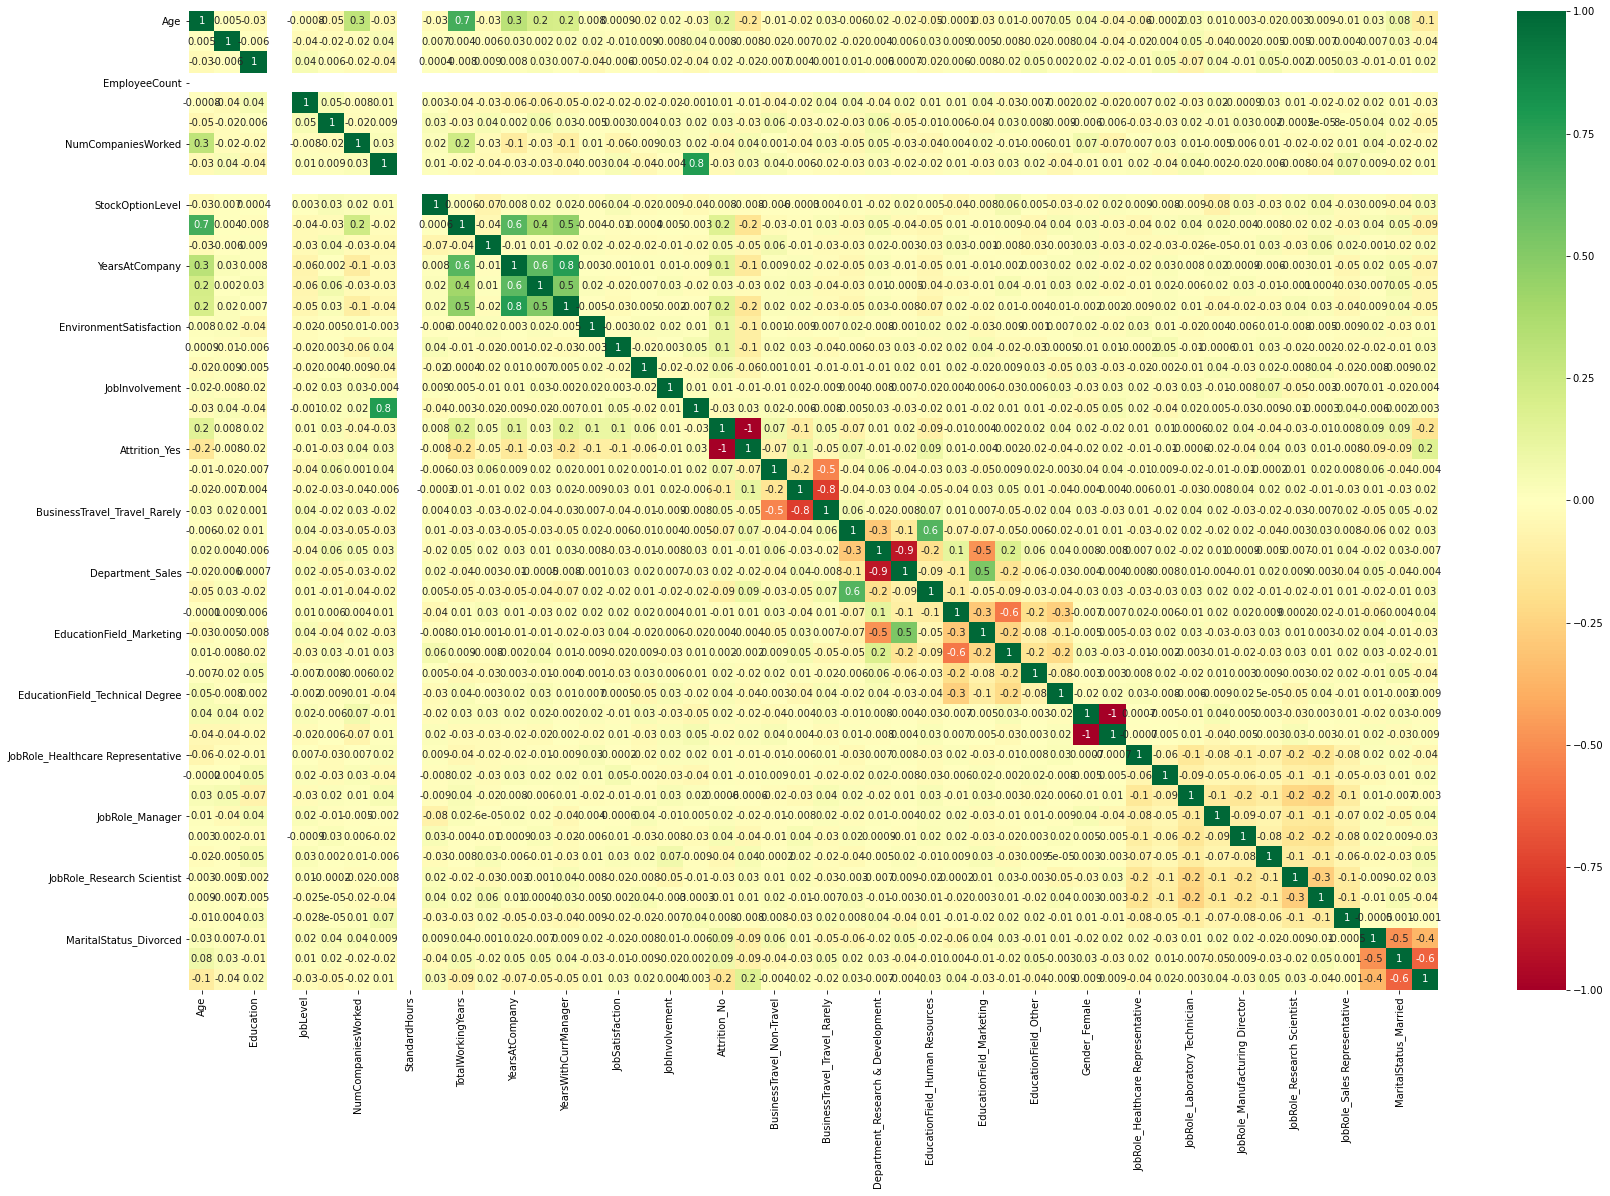

In [19]:
# Строим тепловую карту

sns.heatmap(X.corr(), annot=True, cmap ='RdYlGn', fmt='.1g' ) 
fig=plt.gcf()
fig.set_size_inches(28,18)
plt.show()


In [20]:
# Получаем матрицу корреляции показателей:
profile_1 = (X[[ 'Age','DistanceFromHome','Education','EmployeeCount','JobLevel','MonthlyIncome','NumCompaniesWorked',
              'PercentSalaryHike','StandardHours','StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear',
              'YearsAtCompany','YearsSinceLastPromotion','YearsWithCurrManager','EnvironmentSatisfaction','Attrition_No','Attrition_Yes','JobSatisfaction']].corr())
print(profile_1)

                              Age  DistanceFromHome  Education  EmployeeCount  \
Age                      1.000000          0.004621  -0.034452            NaN   
DistanceFromHome         0.004621          1.000000  -0.006369            NaN   
Education               -0.034452         -0.006369   1.000000            NaN   
EmployeeCount                 NaN               NaN        NaN            NaN   
JobLevel                -0.000781         -0.038576   0.043686            NaN   
MonthlyIncome           -0.047256         -0.019798   0.006381            NaN   
NumCompaniesWorked       0.303709         -0.016336  -0.018156            NaN   
PercentSalaryHike       -0.034313          0.035857  -0.043592            NaN   
StandardHours                 NaN               NaN        NaN            NaN   
StockOptionLevel        -0.030608          0.007376   0.000443            NaN   
TotalWorkingYears        0.681213          0.004364  -0.008236            NaN   
TrainingTimesLastYear   -0.0

In [21]:
profile_2 = (X[['WorkLifeBalance','JobInvolvement','PerformanceRating','Attrition_No','Attrition_Yes','BusinessTravel_Non-Travel',
              'BusinessTravel_Travel_Frequently','BusinessTravel_Travel_Rarely','Department_Human Resources',
              'Department_Research & Development','Department_Sales','EducationField_Human Resources',
              'EducationField_Life Sciences','EducationField_Marketing','EducationField_Medical','EducationField_Other']].corr())
print(profile_2)

                                   WorkLifeBalance  JobInvolvement  \
WorkLifeBalance                           1.000000       -0.017332   
JobInvolvement                           -0.017332        1.000000   
PerformanceRating                        -0.023573        0.012249   
Attrition_No                              0.059817        0.014705   
Attrition_Yes                            -0.059817       -0.014705   
BusinessTravel_Non-Travel                 0.001180       -0.013700   
BusinessTravel_Travel_Frequently          0.010274        0.021242   
BusinessTravel_Travel_Rarely             -0.009633       -0.009142   
Department_Human Resources               -0.010623        0.003919   
Department_Research & Development        -0.014208       -0.008142   
Department_Sales                          0.019404        0.006694   
EducationField_Human Resources            0.009988       -0.020117   
EducationField_Life Sciences              0.018560        0.003907   
EducationField_Marke

In [22]:
profile_3 = (X[['EducationField_Technical Degree','Attrition_No','Attrition_Yes','Gender_Female','Gender_Male','JobRole_Healthcare Representative',
              'JobRole_Human Resources','JobRole_Laboratory Technician','JobRole_Manager','JobRole_Manufacturing Director',
              'JobRole_Research Director','JobRole_Research Scientist','JobRole_Sales Executive','JobRole_Sales Representative',
              'MaritalStatus_Divorced','MaritalStatus_Married','MaritalStatus_Single']].corr())
print(profile_3)

                                   EducationField_Technical Degree  \
EducationField_Technical Degree                           1.000000   
Attrition_No                                              0.037805   
Attrition_Yes                                            -0.037805   
Gender_Female                                            -0.018966   
Gender_Male                                               0.018966   
JobRole_Healthcare Representative                         0.026911   
JobRole_Human Resources                                  -0.007691   
JobRole_Laboratory Technician                            -0.005571   
JobRole_Manager                                          -0.008661   
JobRole_Manufacturing Director                            0.017308   
JobRole_Research Director                                 0.000050   
JobRole_Research Scientist                               -0.050400   
JobRole_Sales Executive                                   0.038492   
JobRole_Sales Repres

In [23]:
#  Наибольшее влияние на увольнение сотрудника оказывают следующие признаки:
# Возраст- Age, Общий стаж - TotalWorkingYears, Стаж в компании - YearsAtCompany, 
# Срок работы под одним боссом -  YearsWithCurrManager, Удовлетворенность окружением- EnvironmentSatisfaction, 
# Частые командировки - BusinessTravel_Travel_Frequently, Семейный статус -  MaritalStatus_Single 

In [50]:
X.corr()

,Age,DistanceFromHome,Education,EmployeeCount,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
Age,1.000000,0.004621,-0.034452,NaN,-0.000781,-0.047256,0.303709,-0.034313,NaN,-0.030608,...,0.034938,0.010980,0.002890,-0.016763,0.003417,0.008978,-0.010989,0.031044,0.084560,-0.117780
DistanceFromHome,0.004621,1.000000,-0.006369,NaN,-0.038576,-0.019798,-0.016336,0.035857,NaN,0.007376,...,0.050018,-0.038302,0.002460,-0.005372,-0.004670,-0.006991,0.004409,0.006731,0.034150,-0.042410
Education,-0.034452,-0.006369,1.000000,NaN,0.043686,0.006381,-0.018156,-0.043592,NaN,0.000443,...,-0.074094,0.043665,-0.012507,0.049312,-0.001979,-0.005498,0.033456,-0.014054,-0.009658,0.022783
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
JobLevel,-0.000781,-0.038576,0.043686,NaN,1.000000,0.045015,-0.008314,0.010119,NaN,0.002940,...,-0.029635,0.024767,-0.000893,0.030755,0.014964,-0.021244,-0.022059,0.018467,0.010176,-0.027255
MonthlyIncome,-0.047256,-0.019798,0.006381,NaN,0.045015,1.000000,-0.020110,0.008684,NaN,0.034453,...,0.016148,-0.014474,0.030756,0.002418,-0.000155,0.000052,0.000082,0.036795,0.018896,-0.052834
NumCompaniesWorked,0.303709,-0.016336,-0.018156,NaN,-0.008314,-0.020110,1.000000,0.030201,NaN,0.015965,...,0.010196,-0.005243,0.006209,0.011828,-0.020444,-0.020090,0.011632,0.041390,-0.018071,-0.017477
PercentSalaryHike,-0.034313,0.035857,-0.043592,NaN,0.010119,0.008684,0.030201,1.000000,NaN,0.012531,...,0.040098,-0.001997,-0.015136,-0.006290,-0.007622,-0.044810,0.065214,0.008582,-0.019738,0.013436
StandardHours,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
StockOptionLevel,-0.030608,0.007376,0.000443,NaN,0.002940,0.034453,0.015965,0.012531,NaN,1.000000,...,-0.008642,-0.084428,0.032390,-0.029860,0.023714,0.042366,-0.026868,0.008682,-0.036668,0.031408


In [51]:
X_ =X.copy()

In [52]:
X_.head()

,Age,DistanceFromHome,Education,EmployeeCount,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,51,6,2,1,1,131160,1.0,11,8,0,...,0,0,0,0,0,0,0,0,1,0
1,31,10,1,1,1,41890,0.0,23,8,1,...,0,0,0,0,1,0,0,0,0,1
2,32,17,4,1,4,193280,1.0,15,8,3,...,0,0,0,0,0,1,0,0,1,0
3,38,2,5,1,3,83210,3.0,11,8,3,...,0,0,0,0,0,0,0,0,1,0
4,32,10,1,1,1,23420,4.0,12,8,2,...,0,0,0,0,0,1,0,0,0,1


In [56]:
# столбец 'Attrition' является целевой переменной, удаляем его из X_
del X_ ['Attrition_No']



In [57]:
del X_ ['Attrition_Yes']

In [59]:
# целевая переменная (столбец 'Attrition') снова является категориальной
# переведем значения столбца в числа, оставив один столбец

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [60]:
le.fit( df_1['Attrition'] )

LabelEncoder()

In [61]:
# записываем в переменную y преобразованный столбец 

y = pd.Series(data= le.transform( df_1['Attrition'] ) )
y.head()

0    0
1    1
2    0
3    0
4    0
dtype: int32

In [62]:
model = LogisticRegression(max_iter=1000)

In [63]:
X_train, X_test, y_train, y_test = train_test_split (X_, y, test_size=0.3, random_state = 40)
model.fit( X_train, y_train )

LogisticRegression(max_iter=1000)

In [64]:
print('Train score:',model.score(X_train, y_train))
print('Test score:', model.score(X_test, y_test))

Train score: 0.8448504983388704
Test score: 0.8232558139534883
